In [1]:
# Bibliotheken laden
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Geometrische Lösung von DLGn
##### Notebook zun Abschnitt 6.1.3 der Vorlesung MH2

Beispiel:

$$y'(t) = -a \cdot y^2(t) + b \cdot e^{\mu t}$$

### 1. Numerische Lösung

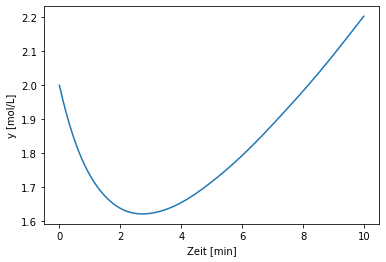

In [2]:
# Definiere Konstanten
a = 0.2
b = 0.4
mu= 0.1

# Definiere Anfangswert y0 und Entzeitpunkt T
y0 = 2 # Anfangswert in mol/l
T = 10 # Endzeitpunkt in min

# Definiere rechte Seite der DGL
def G(t, y):
    dy_dt = -a*y**2 + b*np.exp(mu*t)
    return dy_dt

# Löse DGL numerisch, zu bestimmten Anfangswert
# (d.h., löse Anfangswertproblem)
t_eval = np.linspace(0, T, 1000, endpoint=False)

solution = solve_ivp(G, [0, T], [y0], t_eval=t_eval)
y_t = solution.y[0,:]

# Plotte Lösung
plt.plot(t_eval, y_t)
plt.xlabel('Zeit [min]')
plt.ylabel('y [mol/L]')
plt.show()

### 2. Graphische Lösung

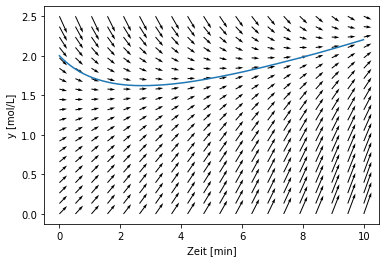

In [3]:
# Anzahl gezeichneter Pfeile (je in t- und y-Richtung)
N = 20

y_max = 2.5

t_grid, y_grid = np.meshgrid(np.linspace(0, T, N),np.linspace(0, y_max, N))
G_grid = G(t_grid, y_grid)

dt = 0.5*T/N
plt.quiver(t_grid, y_grid, np.ones(G_grid.shape)*dt, G_grid*dt, angles='xy', scale_units='xy', scale=1)
plt.xlabel('Zeit [min]')
plt.ylabel('y [mol/L]')

plt.plot(t_eval, y_t) # zeichne numerische Lösung hinzu
plt.show()